In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
sales_file = "../clean_data/Output/all_salesdata.csv"
other_file = "../merged_data/merged_all_data.csv"

In [128]:
sales_df = pd.read_csv(sales_file)
other_df = pd.read_csv(other_file)

cleaner_df = other_df.drop(columns=['NAICS Code'])
employment_df = cleaner_df[['Description','Employment_2000','Employment_2001','Employment_2002','Employment_2003','Employment_2004',
                           'Employment_2005','Employment_2006','Employment_2007','Employment_2008','Employment_2009',
                           'Employment_2010','Employment_2011','Employment_2012','Employment_2013','Employment_2014','Employment_2015']]
establishment_df = cleaner_df[['Description','Establishments_2000','Establishments_2001','Establishments_2002','Establishments_2003',
                              'Establishments_2004','Establishments_2005','Establishments_2006','Establishments_2007','Establishments_2008',
                              'Establishments_2009','Establishments_2010','Establishments_2011','Establishments_2012','Establishments_2013',
                              'Establishments_2014','Establishments_2015']]
establishment_df = establishment_df.transpose()
establishment_df.columns = establishment_df.iloc[0]
establishment_df = establishment_df.drop(establishment_df.index[0])

employment_df = employment_df.transpose()
employment_df.columns = employment_df.iloc[0]
employment_df = employment_df.drop(employment_df.index[0])

employment_df = employment_df.rename(columns = {'Furniture and Home Furnishings Stores':'Furniture',
                                                'Electronics and Appliance Stores':'Electronics',
                                                'Grocery Stores':'Grocery',
                                                'Clothing and Clothing Accessories Stores':'Clothing'})
establishment_df = establishment_df.rename(columns = {'Furniture and Home Furnishings Stores':'Furniture',
                                                'Electronics and Appliance Stores':'Electronics',
                                                'Grocery Stores':'Grocery',
                                                'Clothing and Clothing Accessories Stores':'Clothing'})

employment_df.Furniture = pd.to_numeric(employment_df.Furniture.str.replace(',',''), errors = 'coerce')
employment_df.Electronics = pd.to_numeric(employment_df.Electronics.str.replace(',',''), errors = 'coerce')
employment_df.Grocery = pd.to_numeric(employment_df.Grocery.str.replace(',',''), errors = 'coerce')
employment_df.Clothing = pd.to_numeric(employment_df.Clothing.str.replace(',',''), errors = 'coerce')

establishment_df.Furniture = pd.to_numeric(establishment_df.Furniture.str.replace(',',''), errors = 'coerce')
establishment_df.Electronics = pd.to_numeric(establishment_df.Electronics.str.replace(',',''), errors = 'coerce')
establishment_df.Grocery = pd.to_numeric(establishment_df.Grocery.str.replace(',',''), errors = 'coerce')
establishment_df.Clothing = pd.to_numeric(establishment_df.Clothing.str.replace(',',''), errors = 'coerce')




In [72]:
x_axis = sales_df.Year


In [135]:
clothing_sales = sales_df.shopping_sales
furniture_sales = sales_df.furniture_sales
electronic_sales = sales_df.electronic_sales
grocery_sales = sales_df.grocery_sales

clothing_emp = employment_df.Clothing
furniture_emp = employment_df.Furniture
electronic_emp = employment_df.Electronics
grocery_emp = employment_df.Grocery

clothing_emp = (clothing_emp / 1000)
furniture_emp = (furniture_emp / 1000)
electronic_emp = (electronic_emp / 1000)
grocery_emp = (grocery_emp / 1000)

clothing_est = establishment_df.Clothing
furniture_est = establishment_df.Furniture
electronic_est = establishment_df.Electronics
grocery_est = establishment_df.Grocery

clothing_est = (clothing_est / 100)
furniture_est = (furniture_est / 100)
electronic_est = (electronic_est / 100)
grocery_est = (grocery_est / 100)



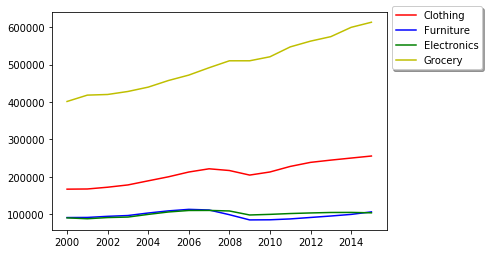

In [145]:
plt.plot(x_axis,clothing_sales,color='r',label='Clothing')
plt.plot(x_axis,furniture_sales,color='b',label='Furniture')
plt.plot(x_axis,electronic_sales,color='g',label='Electronics')
plt.plot(x_axis,grocery_sales,color='y',label='Grocery')
plt.legend(loc="best",bbox_to_anchor=(1, 1.05),fancybox=True, shadow=True)

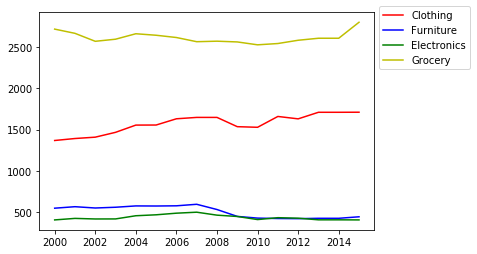

In [142]:
plt.plot(x_axis,clothing_emp,color='r',label='Clothing')
plt.plot(x_axis,furniture_emp,color='b',label='Furniture')
plt.plot(x_axis,electronic_emp,color='g',label='Electronics')
plt.plot(x_axis,grocery_emp,color='y',label='Grocery')
plt.legend(loc="best",bbox_to_anchor=(1, 1.05))


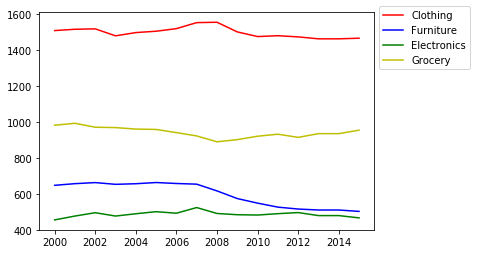

In [143]:
plt.plot(x_axis,clothing_est,color='r',label='Clothing')
plt.plot(x_axis,furniture_est,color='b',label='Furniture')
plt.plot(x_axis,electronic_est,color='g',label='Electronics')
plt.plot(x_axis,grocery_est,color='y',label='Grocery')
plt.legend(loc="best",bbox_to_anchor=(1, 1.05))


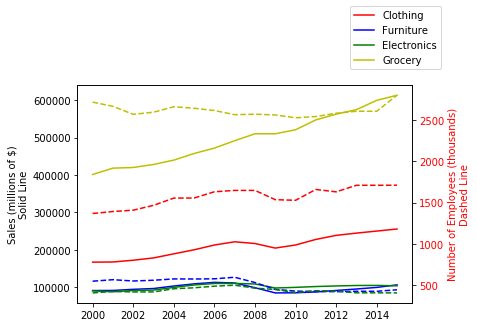

In [197]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x_axis,clothing_sales,color='r',label='Clothing')
ax1.plot(x_axis,furniture_sales,color='b',label='Furniture')
ax1.plot(x_axis,electronic_sales,color='g',label='Electronics')
ax1.plot(x_axis,grocery_sales,color='y',label='Grocery')
ax1.set_ylabel('Sales (millions of $)\nSolid Line')
plt.legend(loc="best",bbox_to_anchor=(.80, 1.05))


ax2 = ax1.twinx()
ax2.plot(x_axis,clothing_emp,'r--',label='Clothing')
ax2.plot(x_axis,furniture_emp,'b--',label='Furniture')
ax2.plot(x_axis,electronic_emp,'g--',label='Electronics')
ax2.plot(x_axis,grocery_emp,'y--',label='Grocery')

ax2.set_ylabel('Number of Employees (thousands)\nDashed Line', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
# plt.legend(['Clothing employees','Furniture employees','Electronic employees','Grocery employees'],bbox_to_anchor=(.5, 1.05))


In [33]:
# sales_df['grocery_total']=sales_df.shopping_sales + sales_df.furniture_sales + sales_df.electronic_sales + sales_df.grocery_sales
sales_df = sales_df[['shopping_sales','furniture_sales','electronic_sales','grocery_sales']]
sales_df

,shopping_sales,furniture_sales,electronic_sales,grocery_sales
0,167112.0,91198.0,90369.0,401587.0
1,167593.0,91480.0,88009.0,418561.0
2,172308.0,94468.0,91188.0,420292.0
3,178417.0,96619.0,92505.0,428342.0
4,189393.0,103327.0,99637.0,439949.0
5,200194.0,109069.0,106128.0,457697.0
6,212950.0,113119.0,110105.0,472130.0
7,221587.0,111410.0,110258.0,491835.0
8,216971.0,98844.0,108827.0,510355.0
9,204773.0,84876.0,98067.0,510394.0


In [50]:
count = len(sales_df.shopping_sales) - 1

shopping_inc = (sales_df['shopping_sales'][count] / sales_df['shopping_sales'][0])*count
furniture_inc = (sales_df['furniture_sales'][count] / sales_df['furniture_sales'][0])*count
electronic_inc = (sales_df['electronic_sales'][count] / sales_df['electronic_sales'][0])*count
grocery_inc = (sales_df['grocery_sales'][count] / sales_df['grocery_sales'][0])*count

In [51]:
shopping_inc
furniture_inc

17.501535121384244

In [52]:
perc_increase_df = pd.DataFrame({"shopping":[shopping_inc],
                                 "furniture":[furniture_inc],
                                 "electronic":[electronic_inc],
                                 "grocery":[grocery_inc]})

In [53]:
perc_increase_df

,shopping,furniture,electronic,grocery
0,22.954994,17.501535,17.240979,22.91369
